# Case One: Project Notebook
By August and William

In [15]:
### Imports
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

# 1. Data Preprocessing
## Load data and remove nan's

In [16]:
df_full = pd.read_excel('dataset.xls')
df_full.FlightNumber = df_full.FlightNumber.astype(object)
df = df_full.dropna()
df = df.loc[df['FlightType'].isin(['C', 'J'])]

## Augment **ScheduleTime** column

In [17]:
df['Year'] = df.ScheduleTime.dt.year.astype(object);
df['Month'] = df['ScheduleTime'].dt.month.astype(object);
df['WeekNumber'] = df['ScheduleTime'].dt.isocalendar().week % 52;
df['Weekday'] = df['ScheduleTime'].dt.dayofweek;
df.WeekNumber = df.WeekNumber.astype(object);
df.Weekday = df.Weekday.astype(object);
df['HourOfDay'] = df['ScheduleTime'].dt.hour.astype(object);
df['MinuteOfHour'] = df['ScheduleTime'].dt.minute.astype(object);

## One-Hot-Encode nominal variables

In [18]:
### Define feature columns
# feature_cols = ['ScheduleTime', 'Airline', 'FlightNumber', 'Destination', 'AircraftType', 'FlightType', 'Sector', 'SeatCapacity', 'Year', 'Month', 'WeekNumber', 'Weekday', 'HourOfDay', 'MinuteOfHour']
feature_cols = ['Airline', 'FlightNumber', 'Destination', 'AircraftType', 'FlightType', 'Sector', 'SeatCapacity', 'Year', 'Month', 'WeekNumber', 'Weekday', 'HourOfDay', 'MinuteOfHour']
under_15_cols = ['FlightType', 'Sector', 'Year', 'Month', 'Weekday', 'MinuteOfHour']
over_15_cols = ['Airline', 'FlightNumber', 'Destination', 'AircraftType', 'WeekNumber', 'HourOfDay']
nominal_cols = ['Airline', 'FlightNumber', 'Destination', 'AircraftType', 'FlightType', 'Sector', 'Year', 'Month', 'WeekNumber', 'Weekday', 'HourOfDay', 'MinuteOfHour']
ordinal_cols = ['SeatCapacity']

### Split target from feature data
X_full = df[feature_cols]
y = df['LoadFactor']

### Encode features with one-hot-encoding
# X = pd.get_dummies(data=X, columns=under_15_cols)
X_full = pd.get_dummies(data=X_full, columns=nominal_cols);

### Print dataframe
X_full

,SeatCapacity,Airline_AY,Airline_BJ,Airline_BT,Airline_BZ,Airline_CL,Airline_CN,Airline_DO,Airline_DT,Airline_DU,...,MinuteOfHour_15,MinuteOfHour_20,MinuteOfHour_25,MinuteOfHour_30,MinuteOfHour_35,MinuteOfHour_40,MinuteOfHour_45,MinuteOfHour_50,MinuteOfHour_54,MinuteOfHour_55
0,142,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,74,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,142,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,72,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,186,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36765,180,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
36766,156,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
36767,156,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
36768,189,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
### Print shape of target
y.shape

(36767,)

We now have the following objects:  
- **X_full** containing all training data, 1312 features (without ScheduleTime).  
- **y** with target data.  
- **X_SeatCapacity** with original seat numbers.  

# 2. Feature Selection
## Berid training data of insignificant features

In [20]:
### We use the variance threshold method for removing features
from sklearn.feature_selection import VarianceThreshold, SelectFdr
FEATURE_SELECTION_VARIANCE_THRESHOLD = 0.005
FEATURE_SELECTION_BH_ALPHA = 0.00005

selector = VarianceThreshold(FEATURE_SELECTION_VARIANCE_THRESHOLD)
X = pd.DataFrame(selector.fit_transform(X_full, y), columns=selector.get_feature_names_out())
X

,SeatCapacity,Airline_AY,Airline_CL,Airline_CN,Airline_DO,Airline_EM,Airline_GQ,Airline_IA,Airline_IK,Airline_IR,...,MinuteOfHour_10,MinuteOfHour_15,MinuteOfHour_20,MinuteOfHour_25,MinuteOfHour_30,MinuteOfHour_35,MinuteOfHour_40,MinuteOfHour_45,MinuteOfHour_50,MinuteOfHour_55
0,142,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,74,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,142,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,72,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,186,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36762,180,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
36763,156,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
36764,156,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
36765,189,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
y

0        0.408451
1        0.189189
2        0.570423
3        0.333333
4        0.204301
           ...   
36765    0.522222
36766    0.532051
36767    0.602564
36768    0.417989
36769    0.497354
Name: LoadFactor, Length: 36767, dtype: float64

### Now, the training data has been reduced from1312 features to 254 features.

## Make copy of **SeatCapacity** for computing forecast accuracy

In [22]:
# SeatCapacity = df.SeatCapacity
X['SeatCapacityOriginal'] = X.SeatCapacity
X

,SeatCapacity,Airline_AY,Airline_CL,Airline_CN,Airline_DO,Airline_EM,Airline_GQ,Airline_IA,Airline_IK,Airline_IR,...,MinuteOfHour_15,MinuteOfHour_20,MinuteOfHour_25,MinuteOfHour_30,MinuteOfHour_35,MinuteOfHour_40,MinuteOfHour_45,MinuteOfHour_50,MinuteOfHour_55,SeatCapacityOriginal
0,142,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,142
1,74,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,74
2,142,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,142
3,72,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,72
4,186,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36762,180,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,180
36763,156,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,156
36764,156,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,156
36765,189,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,189


# 3. Data splitting
## Split data into modeling data (will be training and validation) and test data

In [26]:
from sklearn.model_selection import train_test_split

### Make train/val set *0.8 and test *0.2
def split_model_test(X, y, seed=0):
    X_model, X_test, y_model, y_test = train_test_split(X, y, test_size=0.2, random_state=seed);
    return X_model, X_test, y_model, y_test

def split_train_val(X_m, y_m, seed=0):
    X_train, X_val, y_train, y_val = train_test_split(X_m, y_m, test_size=0.25, random_state=seed)
    X_train_SCO, X_val_SCO = X_train.SeatCapacityOriginal, X_val.SeatCapacityOriginal
    
    X_train = X_train.loc[:, ~X_train.columns.isin(['SeatCapacityOriginal'])]
    X_val = X_val.loc[:, ~X_val.columns.isin(['SeatCapacityOriginal'])]
    return X_train, X_val, y_train, y_val, X_train_SCO, X_val_SCO


# 4. Define validation setup for different models
## Define forecast accuracy function

In [129]:
def mean_forecast_accuracy(loadfactor_forecasted, loadfactor_true, seatcapacity):

    passengers_true = loadfactor_true * seatcapacity
    passengers_forecasted = loadfactor_forecasted * seatcapacity
    # eps = np.finfo(float).eps
    
    abs_deviation_per_flight = np.abs((passengers_true-passengers_forecasted) / passengers_true)
    abs_deviation_per_flight[abs_deviation_per_flight >= 10000] = 100
    print(np.mean(abs_deviation_per_flight))
    return np.mean(100 - abs_deviation_per_flight)

## Define nomralizer for training on **SeatCapacity**

In [34]:
def normalize_seatcapacity_train(X_train):
    scaler = MinMaxScaler()
    scaler.fit(X_train.SeatCapacity.values.reshape(-1, 1))
    X_train.SeatCapacity = scaler.transform(X_train.SeatCapacity.values.reshape(-1, 1))
    return X_train, scaler

def normalize_seatcapacity_val(X_val, scaler):
    X_val.SeatCapacity = scaler.transform(X_val.SeatCapacity.values.reshape(-1, 1))
    return X_val

## Make function that takes the data and a model, and computes the accuracy

In [121]:
### Make functions for computing validation metric
def train_validate_model(X_model, y_model, model):
    
    ## Split data and remove original seatcapacity
    X_train, X_val, y_train, y_val, X_train_SCO, X_val_SCO = split_train_val(X_m=X_model, y_m=y_model, seed=0)

    ## Normalize seatcapacity
    X_train, fitted_scaler = normalize_seatcapacity_train(X_train=X_train)

    ## Fit model to the training data
    model.fit(X=X_train, y=y_train)

    ## Normalize validation data SeatCapacity for predictions
    X_val = normalize_seatcapacity_val(X_val=X_val, scaler=fitted_scaler)

    
    ## Make predictions
    val_pred = model.predict(X=X_val)

    val_acc = mean_forecast_accuracy(loadfactor_forecasted=val_pred, loadfactor_true=y_val.to_numpy(), seatcapacity=X_val_SCO.to_numpy())

    return val_acc, model

## Linear models

In [37]:
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt

In [130]:
X_model, X_test, y_model, y_test = split_model_test(X, y, seed=0)

### Linear Regression
linreg_model = linear_model.LinearRegression()
linreg_val_acc, linreg_trained_model = train_validate_model(X_model=X_model, y_model=y_model, model=linreg_model)

print(f'Linear Regresion Forecast Accuracy: {linreg_val_acc}')

0.6636678941805516
Linear Regresion Forecast Accuracy: 99.33633210581945


alpha = 0.02040816326530612
Train MSE was: 0.036402723404833734
alpha = 0.04081632653061224
Train MSE was: 0.03640461574272139
alpha = 0.061224489795918366
Train MSE was: 0.03640698984344776
alpha = 0.08163265306122448
Train MSE was: 0.03640960902630382
alpha = 0.1020408163265306
Train MSE was: 0.036412349599601414
alpha = 0.12244897959183673
Train MSE was: 0.03641513921142347
alpha = 0.14285714285714285
Train MSE was: 0.03641793261702464
alpha = 0.16326530612244897
Train MSE was: 0.036420700503071474
alpha = 0.18367346938775508
Train MSE was: 0.0364234236287636
alpha = 0.2040816326530612
Train MSE was: 0.036426089436636104
alpha = 0.22448979591836732
Train MSE was: 0.03642868994461305
alpha = 0.24489795918367346
Train MSE was: 0.0364312203650202
alpha = 0.26530612244897955
Train MSE was: 0.036433678165882
alpha = 0.2857142857142857
Train MSE was: 0.0364360624159326
alpha = 0.3061224489795918
Train MSE was: 0.036438373318973906
alpha = 0.32653061224489793
Train MSE was: 0.0364406118783

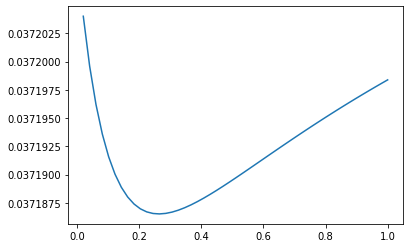

In [ ]:
### Ridge Regression

ridge_mse = []
alphas = np.linspace(start=0, stop=1, num=50)[1:]
for i in alphas:
    print(f'alpha = {i}')
    ridge_model = linear_model.Ridge(alpha=float(i))
    ridge_val_mse, ridge_trained_model = compute_cv_acc(X_cv=X_train, y_cv=y_train, model=ridge_model)
    ridge_mse.append(ridge_val_mse)

plt.plot(alphas, ridge_mse)

# Tree Models

In [ ]:
import xgboost as xgb


In [ ]:
Xtrain, Xval, ytrain, yval = train_test_split(X_cv, y_cv, test_size=0.25, random_state=0)

NameError: name 'X_cv' is not defined